1\. Write a function that converts number representation (bin<->dec<->hex)

In [ ]:
def convert(a, to_base):
    if type(a) == str:
        if a[1] == 'b':
            if to_base == 10:
                return int(a,2)
            elif to_base == 16:
                return hex(int(a,2))
        elif a[1] == 'x':
            if to_base == 10:
                return int(a,16)
            elif to_base == 2:
                return bin(int(a,16))
    elif type(a) == int:
        if to_base == 2:
            return bin(a)
        elif to_base == 16:
            return hex(a)
    return None

2\. Write a function that converts a 32 bit word into a single precision floating point (i.e. interprets the various bits as sign, mantissa and exponent)

In [1]:
def toFloat(binary):
    offset = lambda x : x + 2
    sign = int(binary[offset(0)])
    exponent = int(binary[offset(1):offset(9)],2)
    mantissa = binary[offset(9):]
    mantissa = sum([1]+[int(i)*2**(-(index+1)) for index, i in enumerate(mantissa)])
    value = mantissa*2**(exponent-127)
    if sign:
        return -value
    return value
    
binary = '0b01000001100010000000000000000000' #should be 17
toFloat(binary)

17.0

3\. Write a program to determine the underflow and overflow limits (within a factor of 2) for python on your computer. 

**Tips**: define two variables inizialized to 1 and halve/double them enough time to exceed the under/over-flow limits  

In [3]:
under = 1
over = 1e10

while(True):
    pre = over
    over *= 2
    if over == float('Inf'):
        break
print(pre)

while(True):
    pre = under
    under /= 2
    if under == 0:
        break
print(pre)


1.0463951242053392e+308
5e-324


4\. Write a program to determine the machine precision

**Tips**: define a new variable by adding a smaller and smaller value (proceeding similarly to prob. 2) to an original variable and check the point where the two are the same 

In [2]:
initial = 1.
add = 1e-10
while(True):
    if initial == initial + add:
        break
    add /= 2
    
print(add)

9.5367431640625e-17


5\. Write a function that takes in input three parameters $a$, $b$ and $c$ and prints out the two solutions to the quadratic equation $ax^2+bx+c=0$ using the standard formula:
$$
x=\frac{-b\pm\sqrt{b^2-4ac}}{2a}
$$

(a) use the program to compute the solution for $a=0.001$, $b=1000$ and $c=0.001$

(b) re-express the standard solution formula by multiplying top and bottom by $-b\mp\sqrt{b^2-4ac}$ and again find the solution for $a=0.001$, $b=1000$ and $c=0.001$. How does it compare with what previously obtained? Why?

(c) write a function that compute the roots of a quadratic equation accurately in all cases

In [5]:
import math
#a
def solve(a,b,c):
    square = math.sqrt(b**2 - 4 * a * c)
    x1 = (-b + square)/(2*a)
    x2 = (-b - square)/(2*a)
    return(x1, x2)

print(solve(0.001,1000,0.001))
#b
def solve_mul(a,b,c):
    square = math.sqrt(b**2 - 4 * a * c)
    x1 = (-b + square)/(2*a)*(-b - square)/(-b - square)
    x2 = (-b - square)/(2*a)*(-b + square)/(-b + square)
    return(x1, x2)

print(solve_mul(0.001,1000,0.001))
#c
import cmath
def solve_quad(a,b,c):
    (x1,x2) = solve(a,b,c)
    
    return(cmath.sqrt(x1), -cmath.sqrt(x1),cmath.sqrt(x2),-cmath.sqrt(x2))

print(solve_quad(0.001,1000,0.001))

(-9.999894245993346e-07, -999999.999999)
(-9.999894245993346e-07, -999999.9999989999)
(0.0009999947122856874j, (-0-0.0009999947122856874j), 999.9999999995j, (-0-999.9999999995j))


6\. Write a program that implements the function $f(x)=x(x−1)$

(a) Calculate the derivative of the function at the point $x = 1$ using the derivative definition:

$$
\frac{{\rm d}f}{{\rm d}x} = \lim_{\delta\to0} \frac{f(x+\delta)-f(x)}{\delta}
$$

with $\delta = 10^{−2}$. Calculate the true value of the same derivative analytically and compare with the answer your program gives. The two will not agree perfectly. Why not?

(b) Repeat the calculation for $\delta = 10^{−4}, 10^{−6}, 10^{−8}, 10^{−10}, 10^{−12}$ and $10^{−14}$. How does the accuracy scales with $\delta$?

<IPython.core.display.Javascript object>


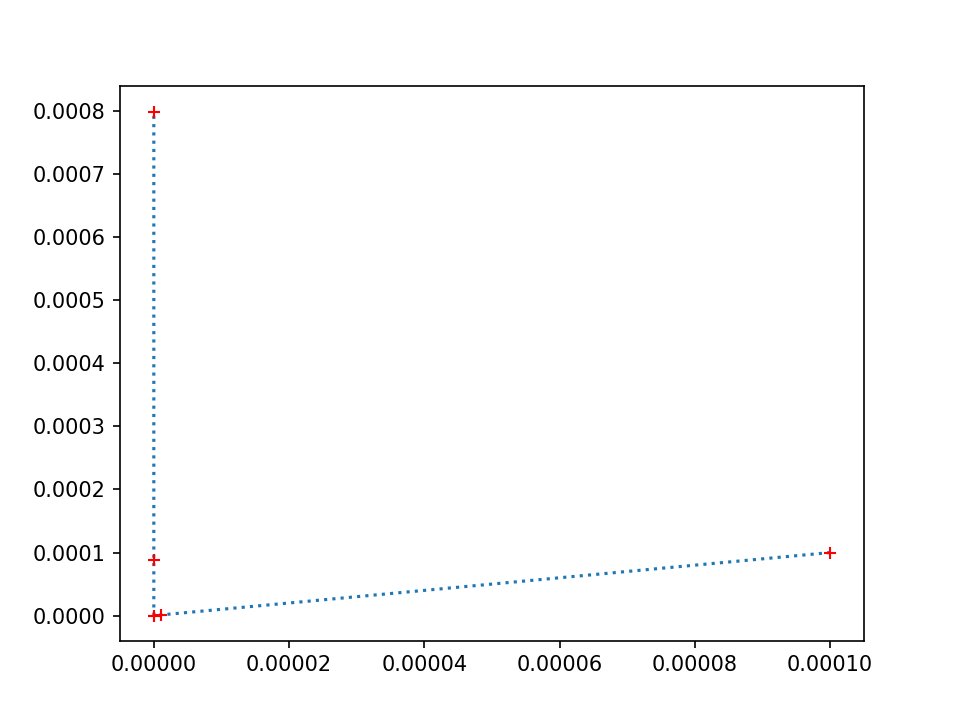

In [40]:
import matplotlib.pyplot as plt
%matplotlib notebook
function = lambda x : x * (x - 1)
calc_derivative = lambda func, x, delta: (func(x+delta)-func(x))/delta
derivative = lambda x : 2 * x -1

deltas = [10**(-2*i) for i in range(1,8)]

results = list(map(lambda x: calc_derivative(function, 1, x), deltas))
true_derivative = derivative(1)
errors = [abs(i-true_derivative) for i in results]
plt.figure()
plt.plot(deltas[1:],errors[1:], ls = ':', marker = '+', mec = 'r')
plt.show()

7\. Consider the integral of the semicircle of radius 1:
$$
I=\int_{-1}^{1} \sqrt(1-x^2) {\rm d}x
$$
which it's known to be $I=\frac{\pi}{2}=1.57079632679...$.
Alternatively we can use the Riemann definition of the integral:
$$
I=\lim_{N\to\infty} \sum_{k=1}^{N} h y_k 
$$

with $h=2/N$ the width of each of the $N$ slices the domain is divided into and where
$y_k$ is the value of the function at the $k-$th slice.

(a) Write a programe to compute the integral with $N=100$. How does the result compares to the true value?

(b) How much can $N$ be increased if the computation needs to be run in less than a second? What is the gain in running it for 1 minute? 


100%|██████████| 6/6 [00:01<00:00,  2.35it/s]


<IPython.core.display.Javascript object>


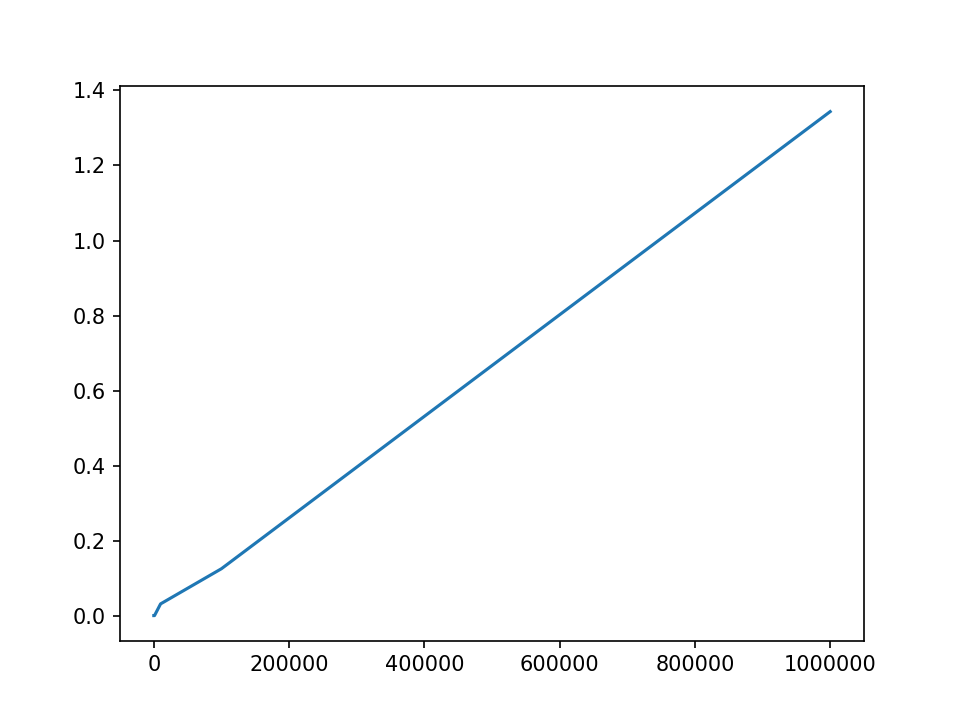

<IPython.core.display.Javascript object>


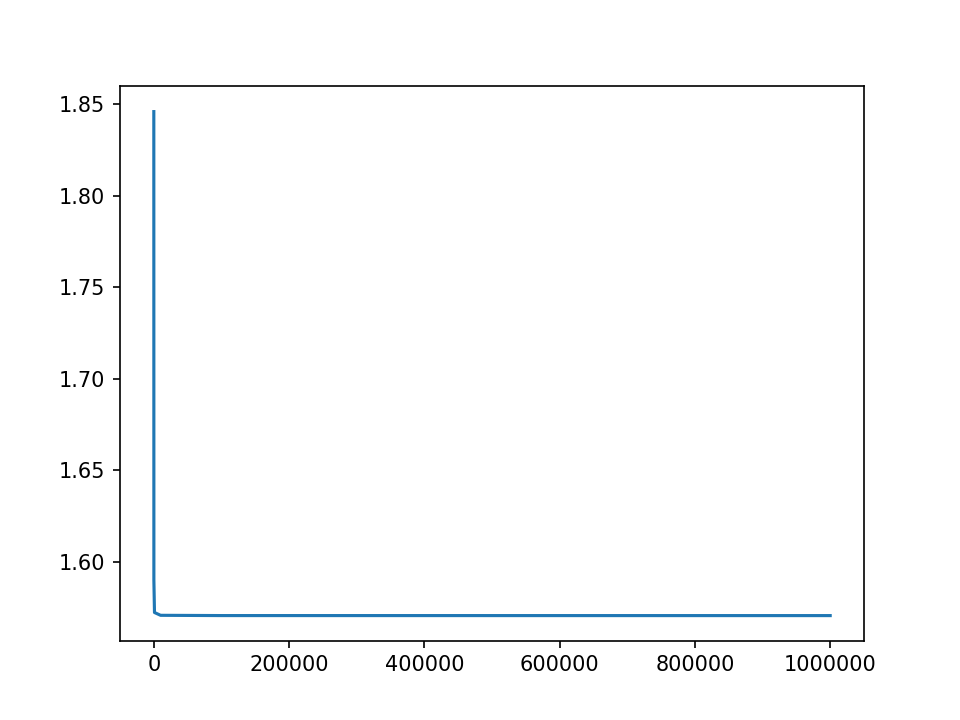

<IPython.core.display.Javascript object>


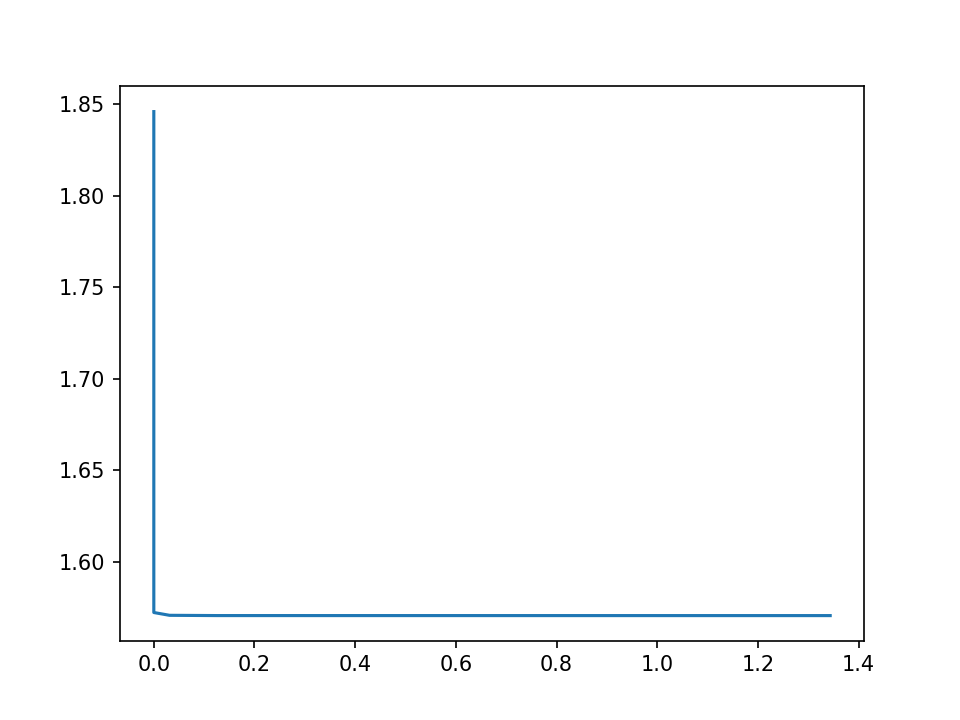

In [2]:
import numpy as np
import time
from tqdm import tqdm
import math
import matplotlib.pyplot as plt
%matplotlib notebook

function = lambda x : math.sqrt(1-x**2)

def calc_int(function, slices, limits= (-1,1)):
    area = 0
    heigth = (limits[1]-limits[0])/slices
    calc_points = list(map(function,np.linspace(limits[0], limits[1], slices)))
    for (x1,x2) in zip(calc_points[:-2],calc_points[1:]):
        base = x1 + x2
        area += base * heigth
    return area / 2

errors = []
execTime = []
NtoTry = [10**i for i in range(1,7)]
for N in tqdm(NtoTry):
    start = time.time()
    value = calc_int(function, N)
    execTime.append(time.time()-start)
    errors.append(abs(math.pi-value))

plt.figure()
plt.plot(NtoTry,execTime)
plt.figure()
plt.plot(NtoTry,errors)
plt.figure()
plt.plot(execTime,errors)
plt.show()


In [ ]:
|